In [19]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Intelligent Programming/diet_recommendations_dataset.csv", index_col=0)
data.head()

,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
Patient_ID,,,,,,,,,,,,,,,,,,,
P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [26]:
print(data.shape)
print(data.duplicated().sum())

(1000, 19)
0


In [21]:
import matplotlib.pyplot as plt

cleaned_data = data.copy()

categorical_features = ["Gender", "Disease_Type", "Severity", "Physical_Activity_Level", "Dietary_Restrictions", "Allergies", "Preferred_Cuisine", "Diet_Recommendation"]

numeric_features = cleaned_data.drop(columns=categorical_features).columns.tolist()

for col in numeric_features:
  Q1 = cleaned_data[col].quantile(0.25)
  Q3 = cleaned_data[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)].reset_index(drop=True)


In [22]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoders = {}

for feature in categorical_features:
    encoder = LabelEncoder()
    cleaned_data[feature] = encoder.fit_transform(cleaned_data[feature])
    encoders[feature] = encoder

with open('/content/drive/My Drive/Intelligent Programming/fitness_coach_agent/encoders/diet_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

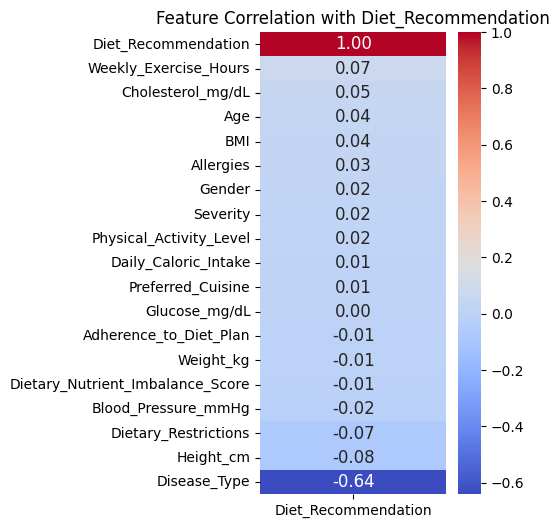

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cleaned_data.corr()

correlation = correlation_matrix['Diet_Recommendation'].sort_values(ascending=False)

plt.figure(figsize=(3, 6))
sns.heatmap(correlation.values.reshape(-1, 1), annot=True, cmap='coolwarm', cbar=True,
            xticklabels=['Diet_Recommendation'], yticklabels=correlation.index,
            annot_kws={'size': 12}, fmt='.2f')

plt.title('Feature Correlation with Diet_Recommendation')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

In [24]:
cleaned_data.to_csv('/content/drive/My Drive/Intelligent Programming/fitness_coach_agent/data/cleaned_diet_data.csv', index=False)
cleaned_data.head()

,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,56,1,58.4,160,22.8,2,1,1,3079,173.3,133,116.3,2,1,3,3.1,96.6,3.1,0
1,69,1,101.2,169,35.4,0,0,1,3032,199.2,120,137.1,2,1,0,4.5,63.2,0.6,1
2,46,0,63.5,173,21.2,1,0,2,1737,181.0,121,109.6,2,1,0,3.8,57.5,4.6,2
3,32,1,58.1,164,21.6,3,0,1,2657,168.2,144,159.4,2,2,3,4.3,54.5,0.4,0
4,60,1,79.5,197,20.5,0,1,2,3496,200.4,172,182.3,1,2,2,9.8,78.2,4.7,1


In [25]:
cleaned_data.shape

(996, 19)